In [2]:
import numpy as np
import pandas as pd
from laser_core.propertyset import PropertySet
from laser_generic import Model
from laser_generic.susceptibility import Susceptibility
from laser_generic.transmission import Transmission
from laser_generic.infection import Infection
from scipy.optimize import curve_fit

f"{np.__version__=}"

"np.__version__='1.26.4'"

In [3]:
scenario = pd.DataFrame(data=[["homenode", 1e6, "47°36′35″N 122°19′59″W"]], columns=["name", "population", "location"])
parameters = PropertySet({"seed": 2, "nticks": 730, "verbose": True, "beta": 0.1, 'inf_mean': 50})
model = Model(scenario, parameters)
model.components = [
    Susceptibility,
    Transmission,
    Infection,
]

2024-12-06 17:42:57.137722: Creating the generic model…
Initializing the generic model with 1 patches…


In [4]:
from laser_generic.utils import seed_infections_randomly

seed_infections_randomly(model, ninfections=1)
model.run()

2024-12-06 17:43:11.883083: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:13<00:00, 53.35it/s] 


Completed the generic model at 2024-12-06 17:43:25.913360…
Model       :        21,294 µs
Transmission:    10,209,920 µs
Infection   :     3,039,730 µs
Total:           13,270,944 microseconds


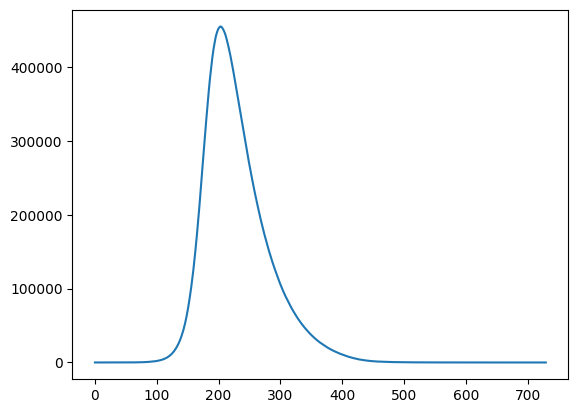

In [5]:
import matplotlib.pyplot as plt
plt.plot(model.patches.cases)